# Conjunto de dados para classificação da qualidade de vinho

## Definição do Problema

O conjunto de dados da qualidade de vinho <https://archive.ics.uci.edu/ml/datasets/wine+quality> consiste na predição da qualidade de vinhos brancos sobre uma escala dada medições químicas de cada vinho.

Trata-se de um problema de classificação multi-classe, mas pode ser também formulado como um problema de regressão. O número de observações para cada classe não é balanceado. Existem 4,898 observações com 11 variáveis de entrada e uma variável de saída. Os nomes das variáveis são as seguintes:

1. Acidez fixa.
2. Acidez volátil.
3. Ácido cítrico.
4. Resíduos de açúcar.
5. Cloretos.
6. Dióxido de enxofre livre.
7. Dióxido de enxofre total.
8. Densidade.
9. pH.
10. Sulfatos.
11. Álcool.
12. Qualidade (nota entre 0 e 10).

Atributo de predição: Classe da qualidade de vinho

### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import Normalizer,StandardScaler

### Carregando e definindo as colunas do dataset

In [30]:
data = pd.read_csv('winequality-red.csv',header=0, sep=';')
#data= data[(data.T != 0).all()]

### Visualização e descrição dos dados

In [31]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [32]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
print(data.shape)

(1599, 12)


In [38]:
print(data.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


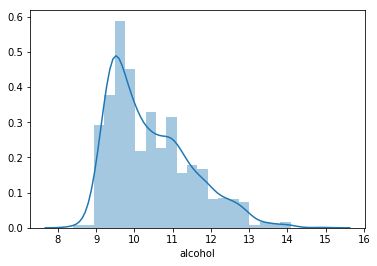

In [39]:
sns.distplot(data.alcohol);

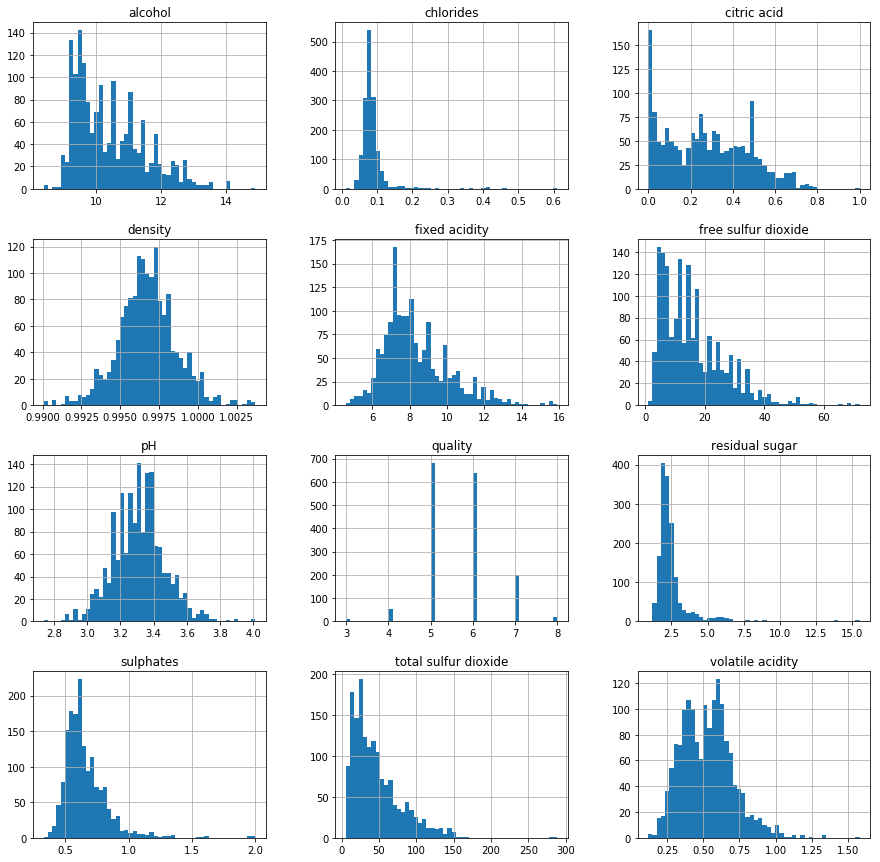

In [40]:
data.hist(figsize=(15,15), bins=50);

In [43]:
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


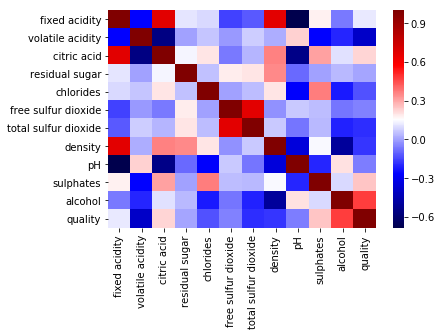

In [44]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='seismic')

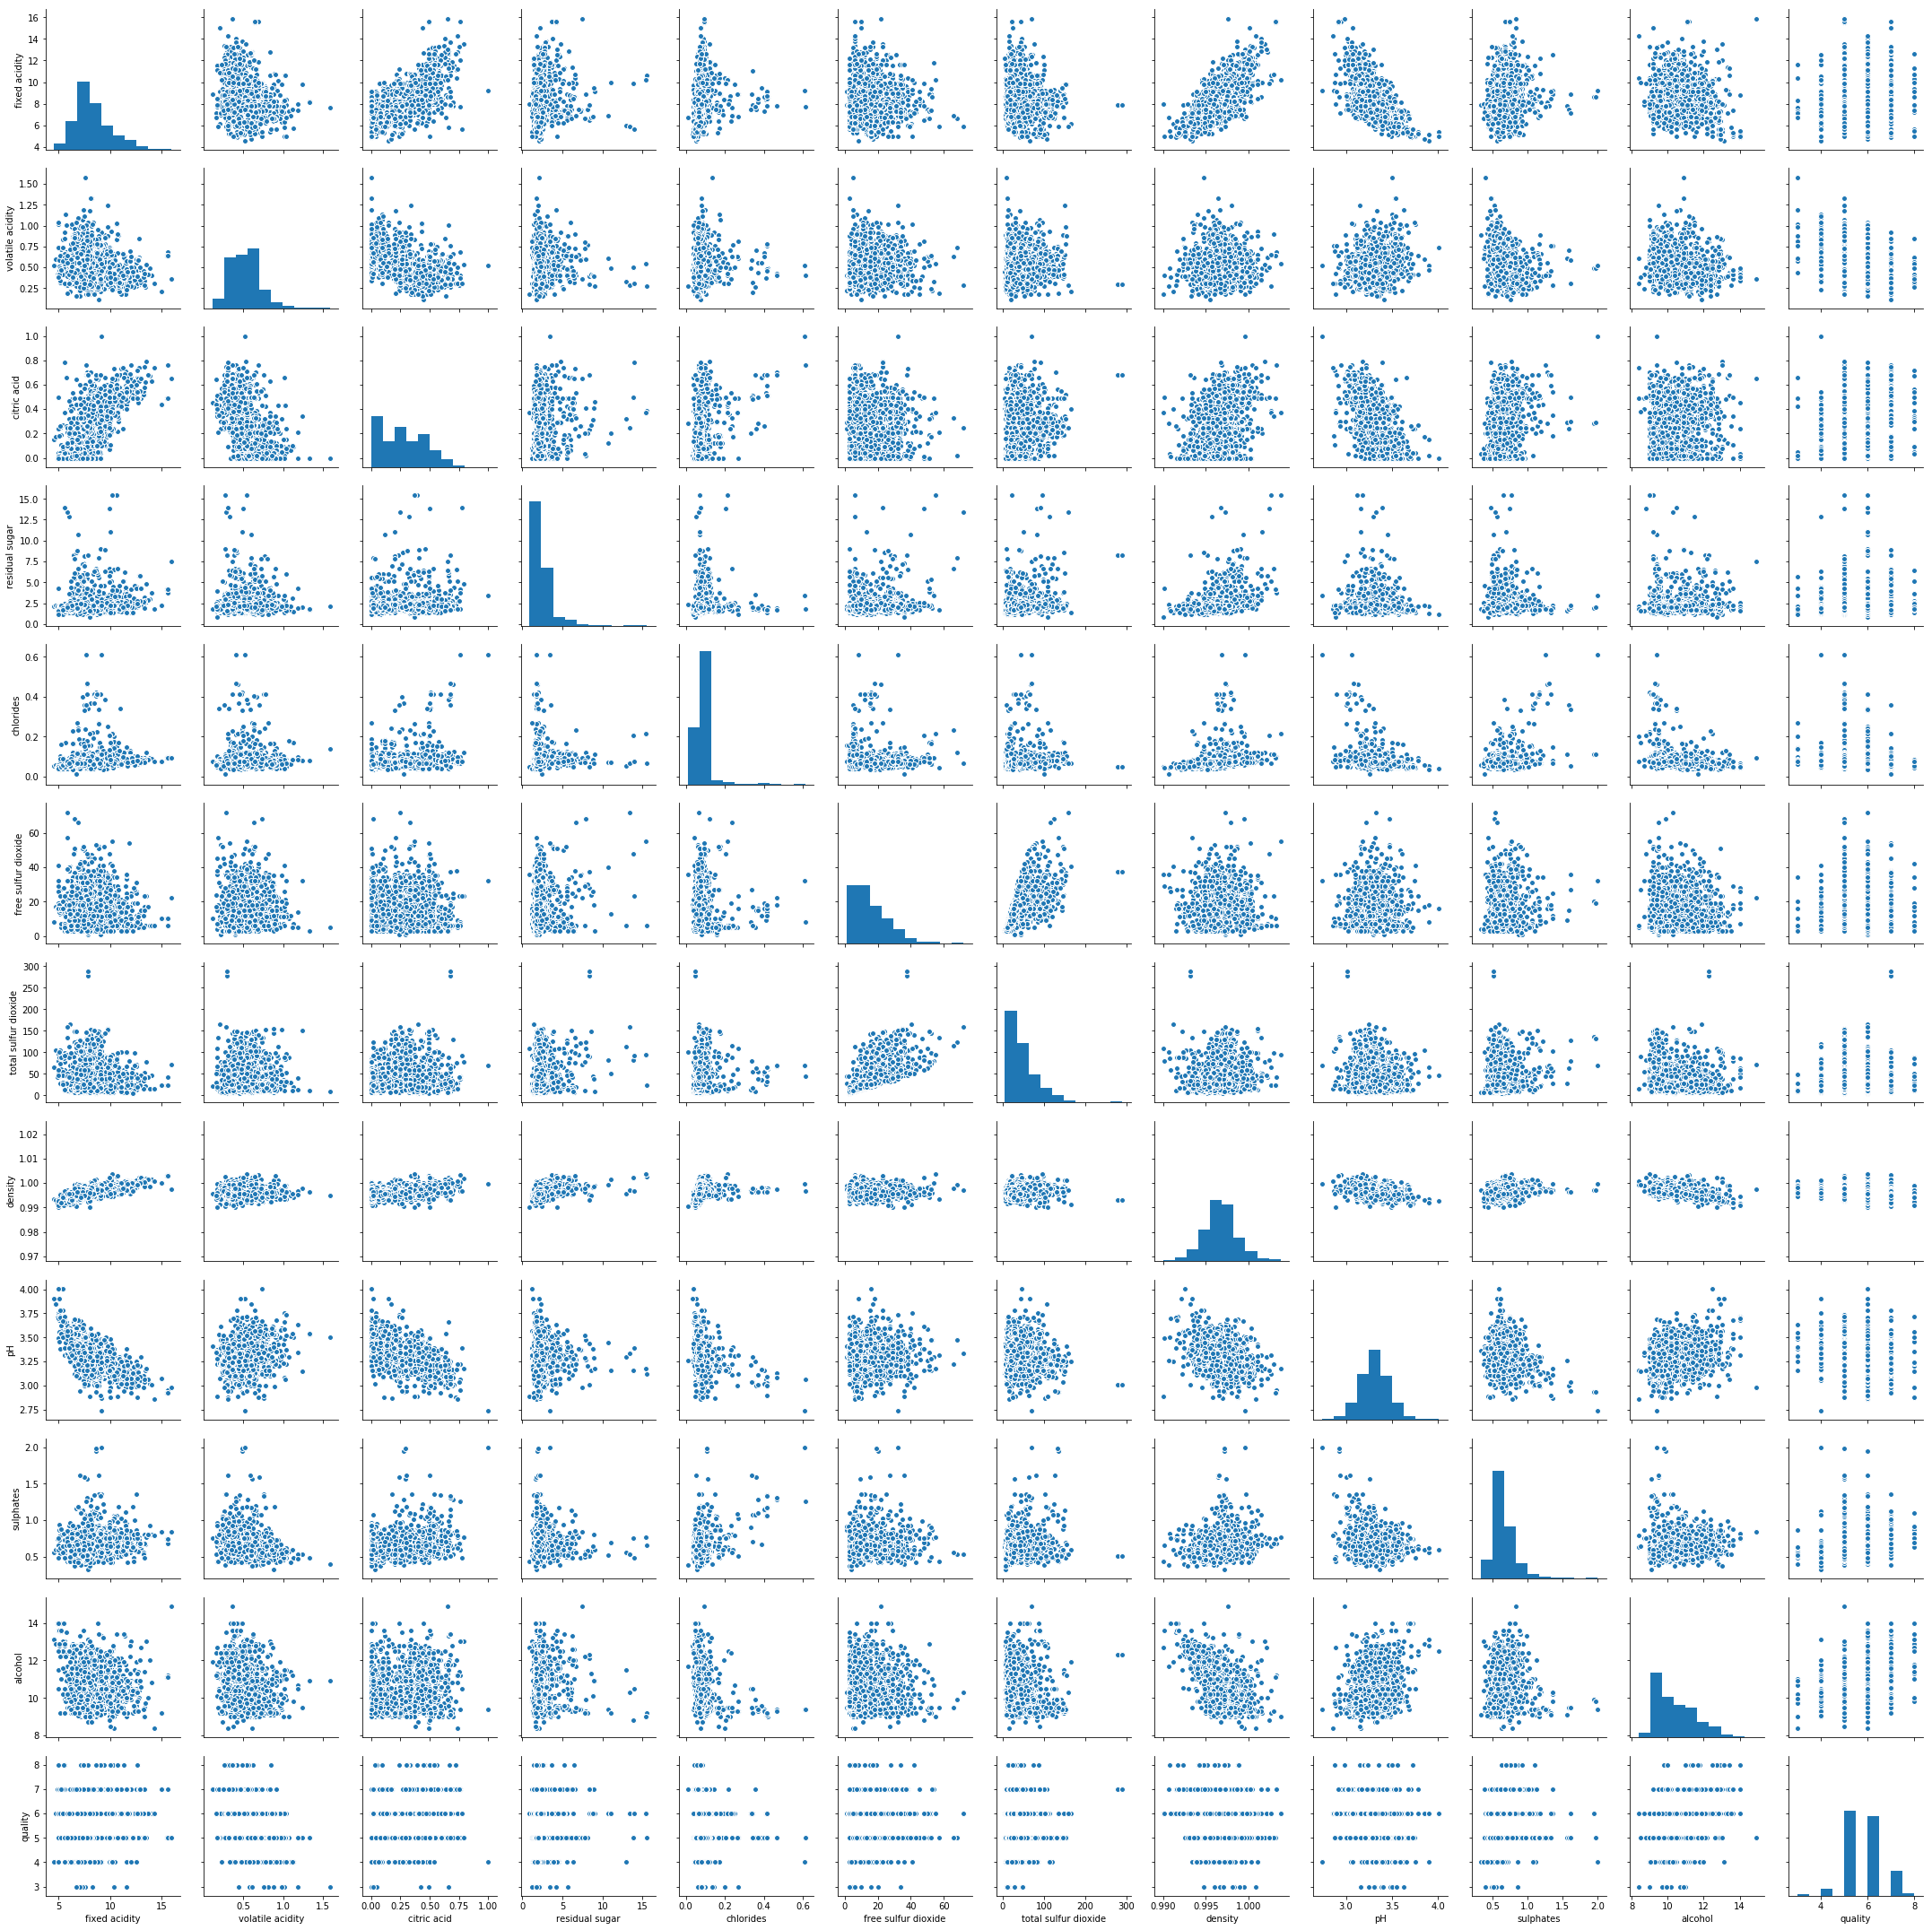

In [45]:
sns.pairplot(data)

### Criação do dataset de validação 

In [46]:
dataset = data.values
print(dataset)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [47]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[ 8.8  ,  0.41 ,  0.64 , ...,  0.66 , 10.5  ,  5.   ],
       [ 8.7  ,  0.63 ,  0.28 , ...,  0.63 , 10.2  ,  6.   ],
       [10.4  ,  0.34 ,  0.58 , ...,  0.7  , 11.3  ,  6.   ],
       ...,
       [ 6.6  ,  0.725,  0.09 , ...,  0.49 , 10.8  ,  6.   ],
       [ 7.2  ,  0.63 ,  0.   , ...,  0.58 ,  9.   ,  6.   ],
       [ 9.1  ,  0.4  ,  0.5  , ...,  0.69 , 12.5  ,  8.   ]])

In [48]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [49]:
split = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=1)
idxs =  split.split(X,y)
for idx_train,idx_test in idxs:
    pass
#print (idx_train, idx_test)

In [50]:
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]

In [51]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1599, 11), (1599,), (1199, 11), (1199,), (400, 11), (400,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [52]:

resultados = {}
resultados['DTC'] = { 'model': tree.DecisionTreeClassifier() }
resultados['SVC'] = { 'model': svm.SVC() }
resultados['KNN'] = { 'model': neighbors.KNeighborsClassifier() }
resultados['LOR'] = { 'model': linear_model.LogisticRegression() }
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': linear_model.SGDClassifier(max_iter=1000) }
resultados['RF'] = { 'model': ensemble.RandomForestClassifier() }
resultados['GB'] = { 'model': ensemble.GradientBoostingClassifier() }

In [53]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['accuracy'] = metrics.accuracy_score(y_test, resultados[key]['y_pred'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [54]:
df = pd.DataFrame(resultados)
df.T[['accuracy','y_pred']]

,accuracy,y_pred
DTC,0.5925,"[6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, ..."
GB,0.63,"[6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
KNN,0.49,"[7.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, ..."
LOR,0.565,"[6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
NB,0.52,"[7.0, 6.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, ..."
RF,0.62,"[6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
SGD,0.58,"[6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, ..."
SVC,0.6025,"[6.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, ..."


In [55]:
df_T = df.transpose()
df_T = df_T[ ['accuracy'] ]
df_T

,accuracy
DTC,0.5925
GB,0.63
KNN,0.49
LOR,0.565
NB,0.52
RF,0.62
SGD,0.58
SVC,0.6025


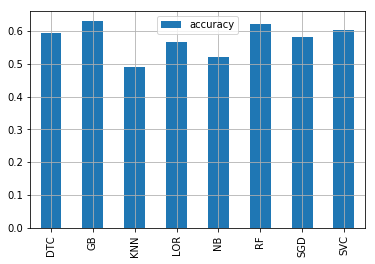

In [56]:
df_T.plot(kind='bar', grid=True);

In [57]:
modelo_final = ensemble.RandomForestClassifier()
modelo_final.fit(X,y);

In [58]:
norm = Normalizer()
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_test_std = std.transform(X_test)
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train_norm, y_train)
    resultados[key]['y_pred_norm'] = resultados[key]['model'].predict(X_test_norm)
    resultados[key]['accuracy_norm'] = metrics.accuracy_score(y_test, resultados[key]['y_pred_norm'])
    resultados[key]['model'].fit(X_train_std, y_train)
    resultados[key]['y_pred_std'] = resultados[key]['model'].predict(X_test_std)
    resultados[key]['accuracy_std'] = metrics.accuracy_score(y_test, resultados[key]['y_pred_std'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [59]:
df = pd.DataFrame(resultados)
df_T = df.transpose()
df_T = df_T[ ['accuracy_norm', 'accuracy_std'] ]
df_T

,accuracy_norm,accuracy_std
DTC,0.5825,0.5875
GB,0.6275,0.6325
KNN,0.5,0.565
LOR,0.49,0.58
NB,0.3975,0.52
RF,0.6,0.6525
SGD,0.5025,0.5575
SVC,0.4875,0.64
